In [186]:
import numpy as np
import pandas as pd
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
X = pd.read_csv("train.csv")
y = X.pop("Survived")

In [188]:
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
X.Age.fillna(X.Age.mean(),inplace=True)

In [190]:
# Male replace to 1, Female replace to 0 
def MF_to_num(x):
    if x == 'male':
        return 1
    else:
        return 0
    
# rewrite only with first letter or if it is NAN value rewrite to "N"   
def cabin(x):
    try:
        return x[0]
    except:
        return "N"

#apply out methods    
X['Sex'] = X.Sex.apply(MF_to_num)
#X['Cabin'] = X.Cabin.apply(cabin)

In [191]:
X.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace=True)

In [192]:
vectors = ['Embarked']
for feature in vectors:
    X[feature].fillna("None",inplace = True)
    dummies = pd.get_dummies(X[feature],prefix=feature)
    X = pd.concat([X,dummies],axis=1)
    X.drop([feature],axis = 1,inplace = True)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [194]:
# Primitive model
model = CatBoostClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.82681564245810057

Trees 20
Score 0.821229050279
Trees 30
Score 0.832402234637
Trees 50
Score 0.832402234637
Trees 100
Score 0.837988826816
Trees 300
Score 0.837988826816
Trees 500
Score 0.837988826816
Trees 700
Score 0.826815642458
Trees 1000
Score 0.815642458101
Trees 1500
Score 0.810055865922
Trees 2000
Score 0.810055865922
Trees 2500
Score 0.810055865922


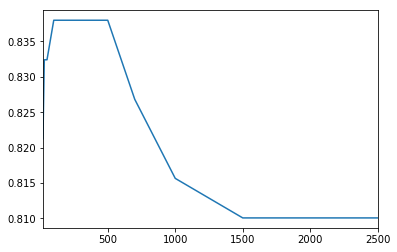

In [195]:
iterators = [20,30,50,100,300,500,700,1000,1500,2000,2500]
res = []
for trees in iterators:
    model = CatBoostClassifier(iterations = trees,
                                random_seed=42)
    model.fit(X_train,y_train)
    print('Trees', trees)
    print('Score',model.score(X_test,y_test))
    res.append(model.score(X_test,y_test))
pd.Series(res,iterators).plot()    

Steps 1
Score 0.815642458101
Steps 0.5
Score 0.804469273743
Steps 0.1
Score 0.832402234637
Steps 0.05
Score 0.837988826816
Steps 0.04
Score 0.843575418994
Steps 0.03
Score 0.837988826816
Steps 0.01
Score 0.826815642458
Steps 0.005
Score 0.826815642458


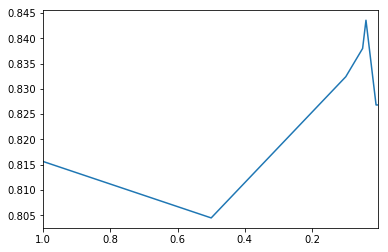

In [196]:
learning_rate = [1,0.5,0.1,0.05,0.04,0.03,0.01,0.005]
res = []
for steps in learning_rate:
    model = CatBoostClassifier(iterations=100,learning_rate=steps,random_seed=42)
    model.fit(X_train,y_train)
    print("Steps", steps)
    print("Score",model.score(X_test,y_test))
    res.append(model.score(X_test,y_test))
pd.Series(res,learning_rate).plot()    

Depth 1
Score 0.793296089385
Depth 2
Score 0.837988826816
Depth 3
Score 0.837988826816
Depth 4
Score 0.837988826816
Depth 5
Score 0.843575418994
Depth 6
Score 0.843575418994
Depth 7
Score 0.837988826816
Depth 8
Score 0.837988826816
Depth 9
Score 0.832402234637
Depth 10
Score 0.826815642458
Depth 11
Score 0.843575418994


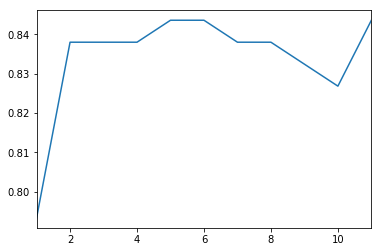

In [197]:
depth = [1,2,3,4,5,6,7,8,9,10,11]
res = []

for d in depth:
    model = CatBoostClassifier(iterations=100, learning_rate=0.04,depth = d,random_seed=42)
    model.fit(X_train,y_train)
    print("Depth",d)
    print("Score",model.score(X_test,y_test))
    res.append(model.score(X_test,y_test))
pd.Series(res, depth).plot()    

Leaf Newton
Score 0.843575418994
Leaf Gradient
Score 0.837988826816


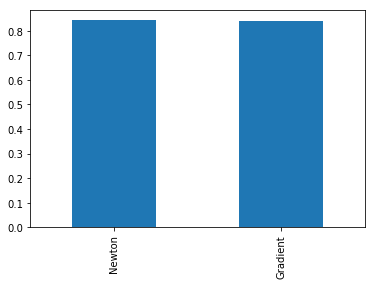

In [198]:
leaf_estimation = ['Newton','Gradient']
res = []

for leaf in leaf_estimation:
    model = CatBoostClassifier(iterations=100, learning_rate=0.04,depth = 5, leaf_estimation_method=leaf,random_seed=42)
    model.fit(X_train,y_train)
    print("Leaf",leaf)
    print("Score",model.score(X_test,y_test))
    res.append(model.score(X_test,y_test))
pd.Series(res, leaf_estimation).plot(kind='bar')    

Leaf 1
Score 0.849162011173
Leaf 2
Score 0.837988826816
Leaf 3
Score 0.843575418994
Leaf 4
Score 0.837988826816
Leaf 5
Score 0.843575418994
Leaf 6
Score 0.832402234637
Leaf 7
Score 0.837988826816
Leaf 8
Score 0.837988826816
Leaf 9
Score 0.826815642458
Leaf 10
Score 0.832402234637


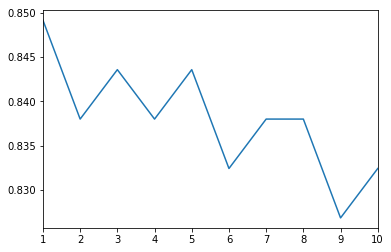

In [199]:
l2_leaf_reg = [1,2,3,4,5,6,7,8,9,10]
res = []

for leaf_reg in l2_leaf_reg:
    model = CatBoostClassifier(iterations=100, 
                               learning_rate=0.04,
                               depth = 5, 
                               leaf_estimation_method='Newton',
                               l2_leaf_reg = leaf_reg,
                               random_seed=42)
    model.fit(X_train,y_train)
    print("Leaf",leaf_reg)
    print("Score",model.score(X_test,y_test))
    res.append(model.score(X_test,y_test))
pd.Series(res, l2_leaf_reg).plot()    

In [228]:
model = CatBoostClassifier(iterations=100, 
                               learning_rate=0.04,
                               depth = 5, 
                               leaf_estimation_method='Gradient',
                               l2_leaf_reg = 1,
                               random_seed=42)
model.fit(X_train,y_train)

In [229]:
predicted = model.predict(X_test)
print(model.score(X_test,y_test))
print(metrics.classification_report(predicted,y_test))

0.837988826816
             precision    recall  f1-score   support

        0.0       0.94      0.83      0.88       126
        1.0       0.68      0.87      0.76        53

avg / total       0.86      0.84      0.84       179



#### Final Training model

In [202]:
model.fit(X,y)

In [204]:
X_test = pd.read_csv("test.csv")
X_test['Age'].fillna(X_test['Age'].mean(), inplace = True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace = True)
X_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace=True)

X_test['Sex'] = X_test.Sex.apply(MF_to_num)
#X_test['Cabin'] = X_test.Cabin.apply(cabin)
  
for feature in vectors:
    X_test[feature].fillna("None", inplace = True)
    dummies_test = pd.get_dummies(X_test[feature],prefix=feature)
    X_test = pd.concat([X_test,dummies_test],axis = 1)
    X_test.drop([feature],axis = 1,inplace = True)

In [205]:
result = model.predict(X_test)
result = result.astype(int)

In [206]:
file = pd.DataFrame(result)
file.to_csv('submission.csv', index=False, header=False)